<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B0%D0%B2%D1%82%D0%BE_%D0%B0%D0%B2%D1%82%D0%BE_%D0%BF%D0%BE_36_%D0%BC%D0%B0%D1%80%D0%BA%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Распознавание изображений из набора 36 марок машин




In [ ]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Распознавание марок машин (маленькая база)

In [ ]:
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
#gdown.download('https://storage.googleapis.com/datasets_ai/Base/5_Conv/middle_fmr.zip', None, quiet=True)

In [ ]:
!unrar x "/content/drive/MyDrive/Numpy/car_classification.rar" "/content/drive/MyDrive/Numpy" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Numpy/car_classification.rar

Creating    /content/drive/MyDrive/Numpy/car_classification           OK
Creating    /content/drive/MyDrive/Numpy/car_classification/AUDI      OK
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_1009.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_161.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_17.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_384.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_406.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screenshot_414.png       0%  OK 
Extracting  /content/drive/MyDrive/Numpy/car_classification/AUDI/Screensho

In [ ]:
train_path = '/content/drive/MyDrive/Numpy/car_classification' #Папка с папками картинок, рассортированных по категориям
batch_size = 10
img_width = 96 #Ширина изображения
img_height = 48 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 960 images belonging to 36 classes.
Found 90 images belonging to 36 classes.


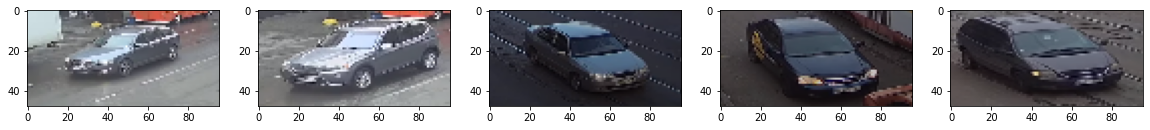

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 5, figsize=(20, 10)) #Создаем полотно из 3 графиков
for i in range(5): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
#Второй сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Четвертый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Пятый сверточный слой
model.add(Flatten())
#Полносвязный слой
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=36, verbose=1)

Epoch 1/36
 1/96 [..............................] - ETA: 6s - loss: 3.2482 - accuracy: 0.1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


96/96 [==============================] - 6s 61ms/step - loss: 3.1441 - accuracy: 0.1146 - val_loss: 3.1378 - val_accuracy: 0.1778
Epoch 2/36
96/96 [==============================] - 6s 60ms/step - loss: 3.1393 - accuracy: 0.1281 - val_loss: 3.1169 - val_accuracy: 0.1111
Epoch 3/36
96/96 [==============================] - 6s 60ms/step - loss: 3.1336 - accuracy: 0.1063 - val_loss: 3.0622 - val_accuracy: 0.1333
Epoch 4/36
96/96 [==============================] - 6s 63ms/step - loss: 3.1181 - accuracy: 0.1177 - val_loss: 3.0328 - val_accuracy: 0.1111
Epoch 5/36
96/96 [==============================] - 6s 61ms/step - loss: 3.1061 - accuracy: 0.1167 - val_loss: 3.0264 - val_accuracy: 0.1333
Epoch 6/36
96/96 [==============================] - 6s 61ms/step - loss: 3.0984 - accuracy: 0.1219 - val_loss: 3.0198 - val_accuracy: 0.1667
Epoch 7/36
96/96 [==============================] - 6s 67ms/step - loss: 3.0910 - accuracy: 0.1219 - val_loss: 2.9627 - val_accuracy: 0.1444
Epoch 8/36
96/96 [======

In [ ]:
model.save('cars36.h5')

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 

INPUT_SHAPE = (64, 168, 3)

model = load_model('cars36.h5', compile = False)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 48, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 48, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 16, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 32, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 16, 128)       147584    
                                                      

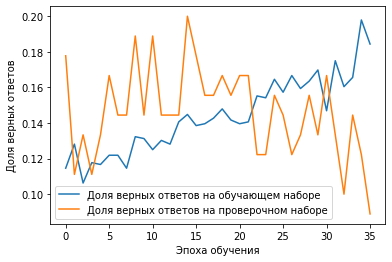

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Глоссарий

**Сверточная нейронная сеть** - архитектура нейронных сетей, направленная на решение задачи распознавания образов 

---

**Dense** - полносвязный слой 

**conv2D** - сверточный слой 

**MaxPooling2D** - слой объединения для пространственных данных 

**Dropout** - случайная блокировка нейронов для предотвращения переобучения

**BatchNormalization** - слой пакетной нормализации

**categorical_crossentropy** - метод определения ошибки нейронной сети для категориальных данных (классов). Категориальная кроссцентропия между выходным результатом и y_train.

**Flatten** - слой преобразования двумерных данных в одномерные